<a href="https://colab.research.google.com/github/royalpop/university_assignment/blob/main/Assignment1_0350925_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Base.csv')
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,...,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,...,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,AA,1418,...,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4


In [ ]:
columns_to_keep = ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count','current_address_months_count','customer_age','payment_type','intended_balcon_amount']
df = df.loc[:, columns_to_keep]

In [ ]:
df.dropna()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,payment_type,intended_balcon_amount
0,1,0.9,0.166828,-1,88,50,AA,-1.331345
1,1,0.9,0.296286,-1,144,50,AB,-0.816224
2,1,0.9,0.044985,-1,132,40,AC,-0.755728
3,1,0.9,0.159511,-1,22,50,AB,-1.205124
4,1,0.9,0.596414,-1,218,50,AB,-0.773276
...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,AB,-1.044454
999996,0,0.8,0.322989,148,9,50,AC,-1.409803
999997,0,0.8,0.879403,-1,30,20,AA,34.692760
999998,0,0.9,0.762112,-1,189,20,AA,94.661055


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df = df.truncate(after=4000)

In [ ]:
df.isnull().sum()

fraud_bool                      0
income                          0
name_email_similarity           0
prev_address_months_count       0
current_address_months_count    0
customer_age                    0
payment_type                    0
intended_balcon_amount          0
dtype: int64

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    frequency_table = df[column].value_counts()
    print(frequency_table)

AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: payment_type, dtype: int64


In [ ]:
categorical_columns

Index(['payment_type'], dtype='object')

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_df.corr()

correlation

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount
fraud_bool,1.000000,0.045079,-0.036720,-0.026031,0.033701,0.062959,-0.024524
income,0.045079,1.000000,-0.038519,0.018209,-0.036985,0.125822,0.059046
name_email_similarity,-0.036720,-0.038519,1.000000,-0.018186,0.050305,-0.048902,0.029040
prev_address_months_count,-0.026031,0.018209,-0.018186,1.000000,-0.271730,-0.069178,-0.009428
current_address_months_count,0.033701,-0.036985,0.050305,-0.271730,1.000000,0.142863,0.057601
customer_age,0.062959,0.125822,-0.048902,-0.069178,0.142863,1.000000,-0.013000
intended_balcon_amount,-0.024524,0.059046,0.029040,-0.009428,0.057601,-0.013000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fraud_bool                    4001 non-null   int64  
 1   income                        4001 non-null   float64
 2   name_email_similarity         4001 non-null   float64
 3   prev_address_months_count     4001 non-null   int64  
 4   current_address_months_count  4001 non-null   int64  
 5   customer_age                  4001 non-null   int64  
 6   payment_type                  4001 non-null   object 
 7   intended_balcon_amount        4001 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 250.2+ KB


KeyboardInterrupt: ignored

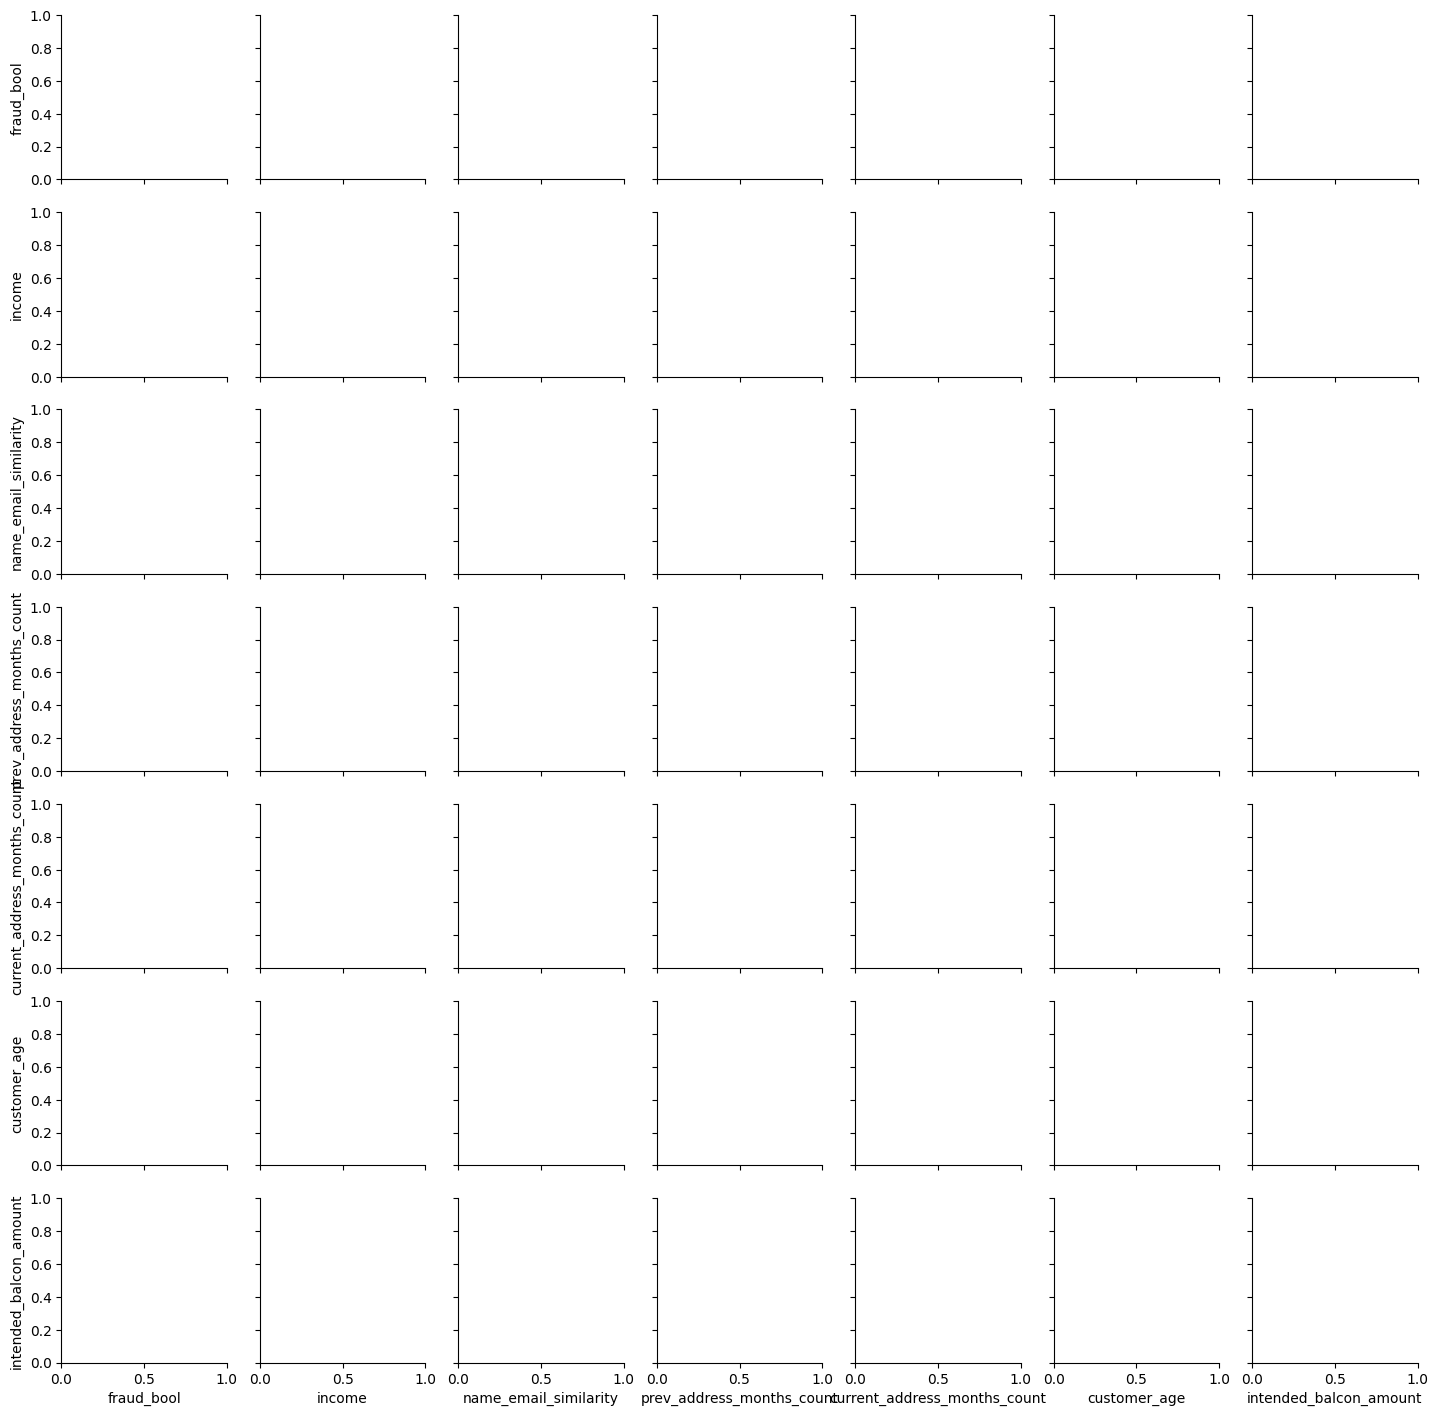

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
import seaborn as sns

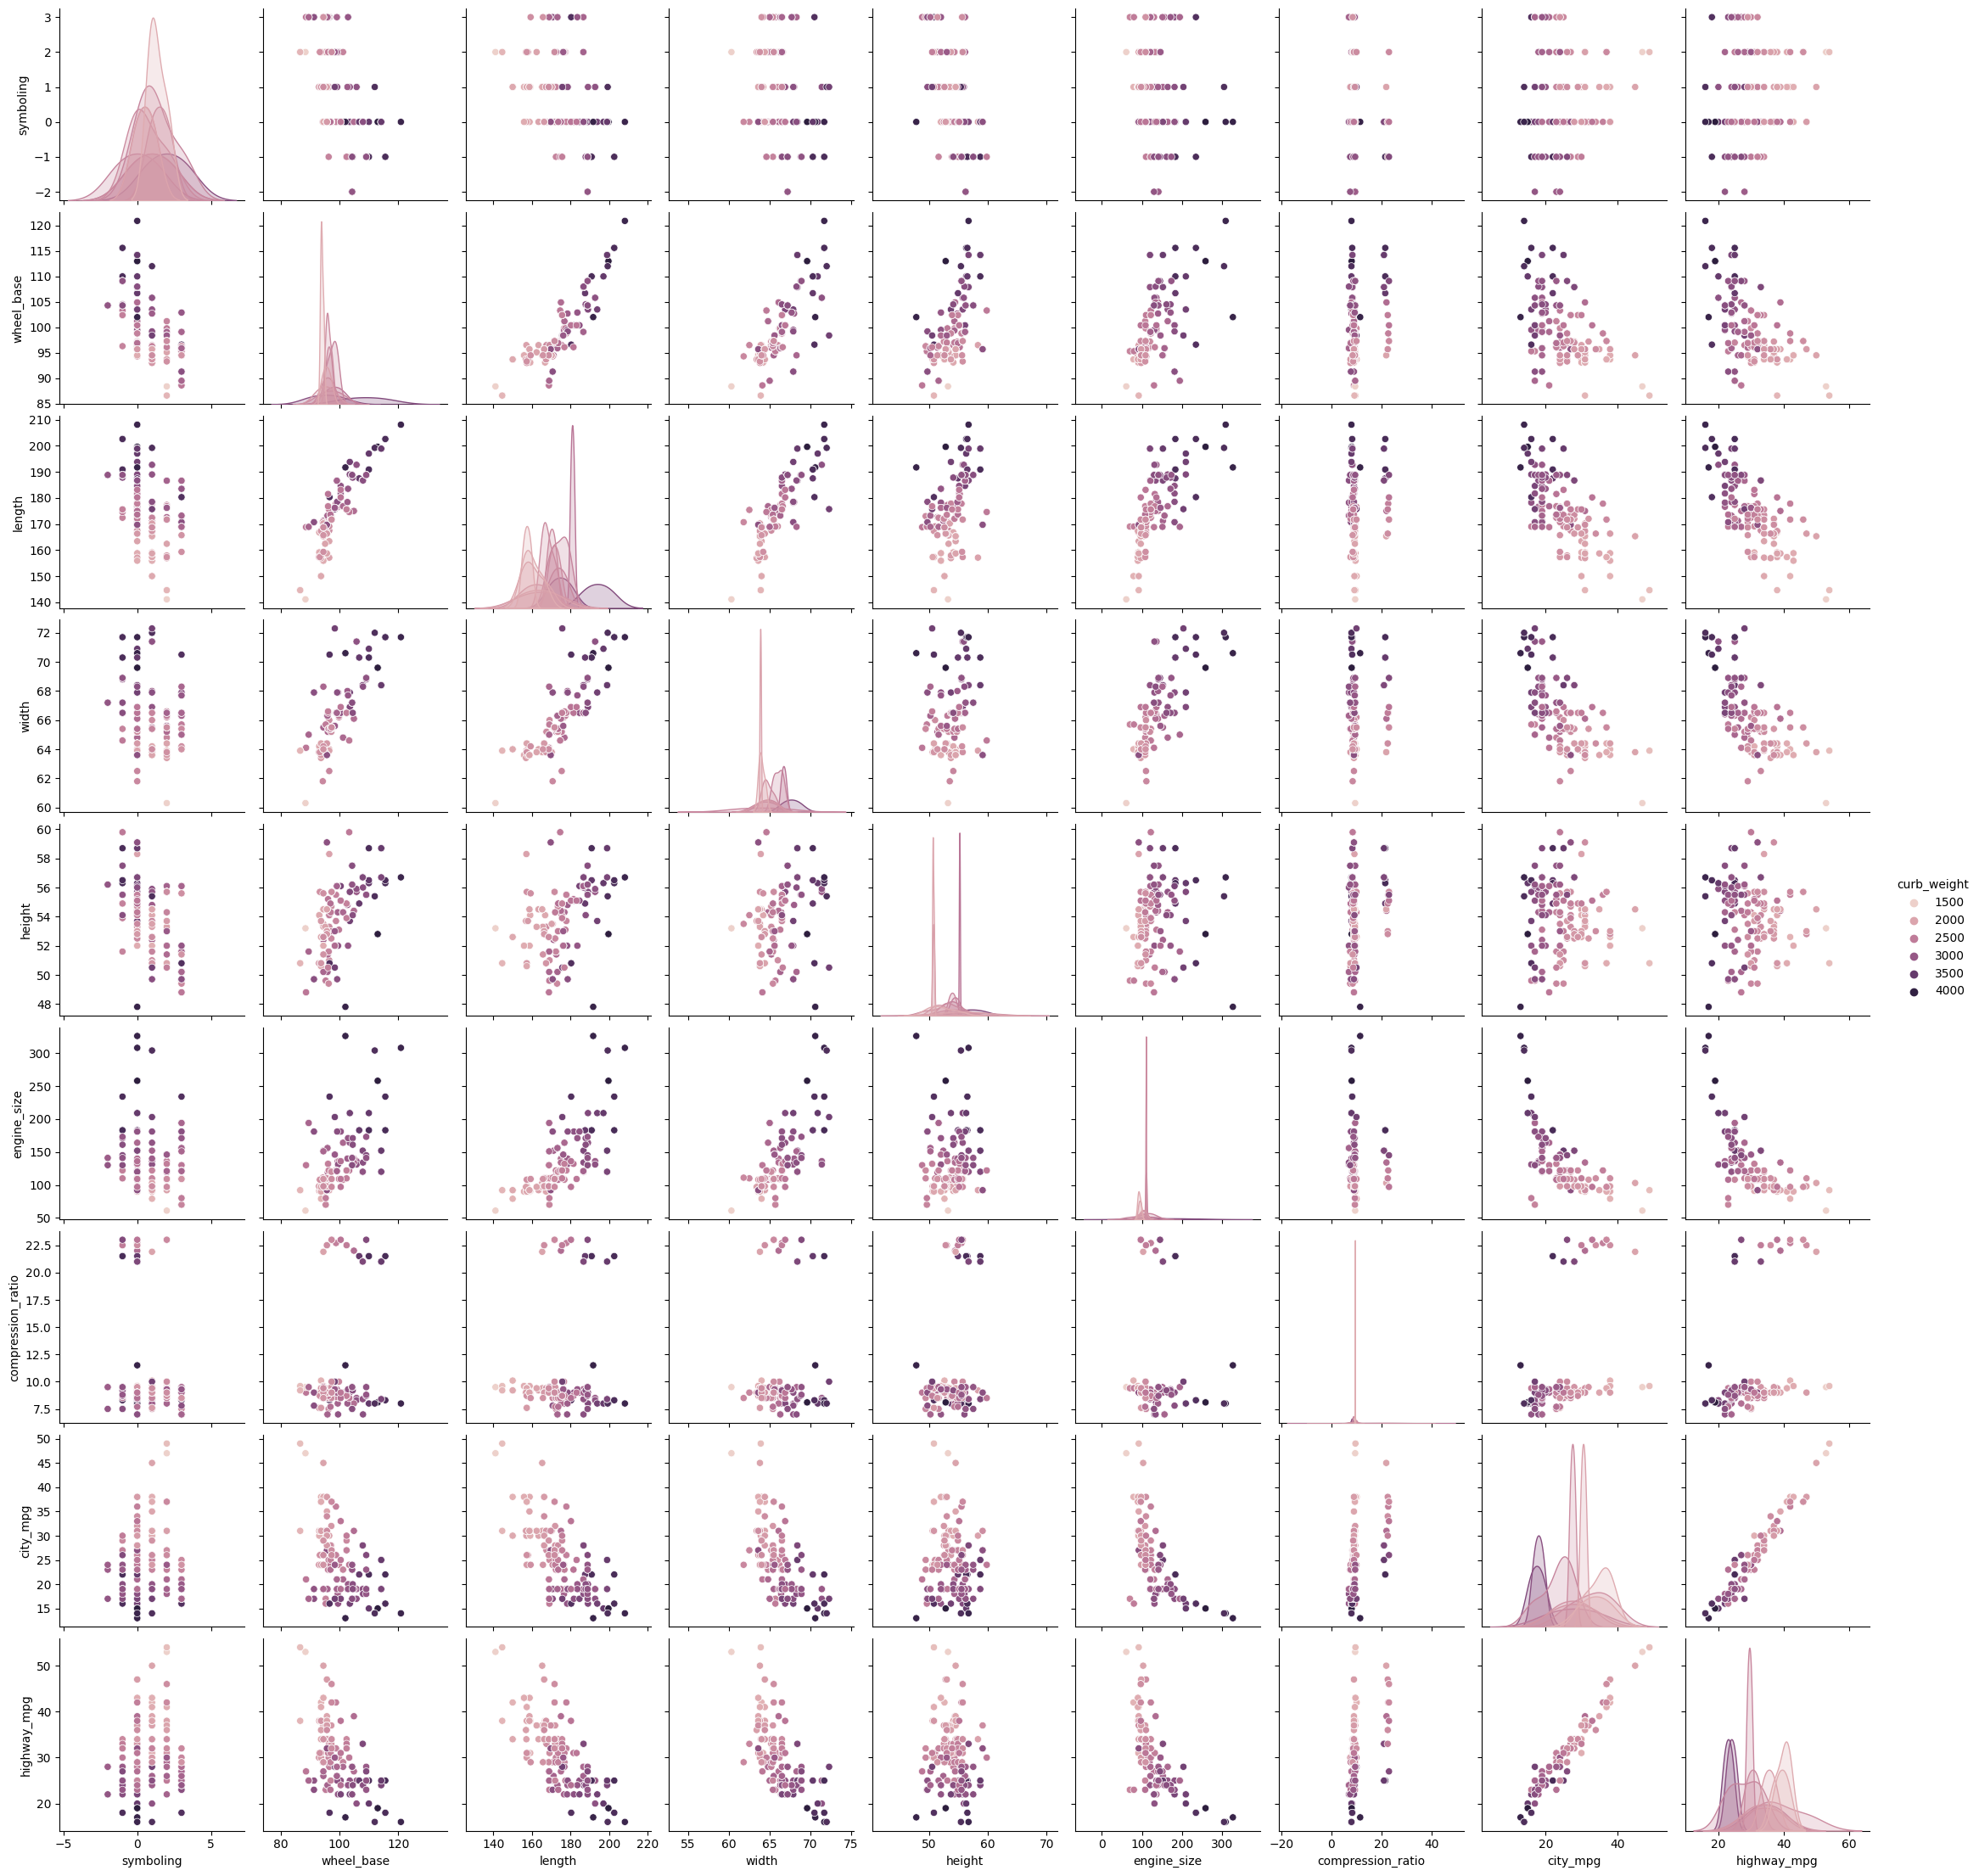

In [ ]:
sns.pairplot(df, hue='curb_weight')

In [ ]:
rows_with_question_mark = df.loc[df.eq('?').any(axis=1)]
rows_with_question_mark

NameError: ignored

In [ ]:
columns_with_question_mark = rows_with_question_mark.columns[df.eq('?').any()]
columns_with_question_mark

Index([], dtype='object')

In [ ]:
X = df['fraud_bool'].astype(int).values.reshape(-1, 1)
y = df['income'].values

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression()

In [ ]:
import seaborn as sns

In [ ]:
y_pred = regression_model.predict(X)

In [ ]:
plt.scatter(X, y, color='b', label='Fraud count')
plt.plot(X, y_pred, color='r', label='Prediction')
plt.xlabel('Fraud')
plt.ylabel('Income')
plt.legend()
plt.show()

NameError: ignored

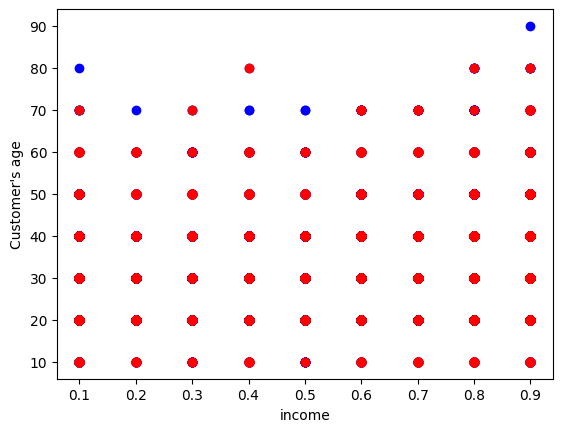

In [ ]:
cdf = df[['income','customer_age']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

plt.scatter(train.income, train.customer_age,  color='blue')
plt.scatter(test.income, test.customer_age,  color='red')
plt.xlabel("income")
plt.ylabel("Customer's age")
plt.show()

In [ ]:
from sklearn import linear_model

np.random.seed(98)

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['fraud_bool']])

train_y = np.asanyarray(train[['income']])
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

KeyError: ignored

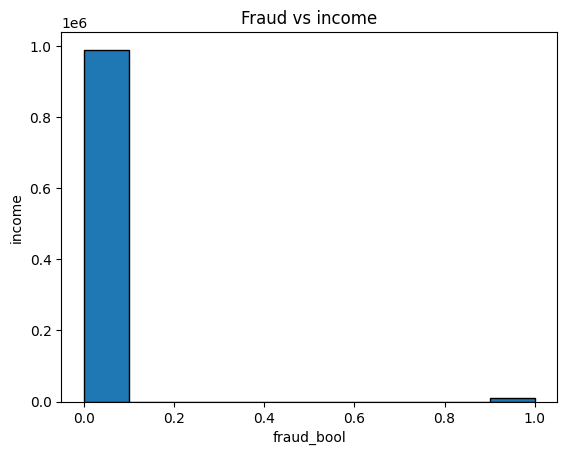

In [ ]:
plt.hist(df['fraud_bool'], bins=10, edgecolor='black')
plt.xlabel('fraud_bool')
plt.ylabel('income')
plt.title('Fraud vs income')
plt.show()

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-7-a3994c5945e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: ignored

<Figure size 800x600 with 0 Axes>